In [18]:
# load libraries used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




# Returns




* Define what are returns, which is the key variable of analysis in finance (and this class).
* Discuss how to think them of random variables 
* Discuss the key statistical "moments" that we will use to capture their behavior (i.e. how risky they are)
* Discuss the normal distribution specifically
* Define the concept of Excess returns



**What is a return?**


* Lets say you paid $𝑃_𝑡$ in date $t$ for an asset

* In date $t+1$ the price is $𝑃_{𝑡+1}$  and you earn some dividend as well $𝐷_{𝑡+1}$

* Then we say that your return is

$$𝑅_{𝑡+1}=\frac{𝑃_{𝑡+1}+𝐷_{𝑡+1}−𝑃_𝑡}{𝑃_𝑡}$$

* It is the gain you made (everything that you go in date t+1), divided by how much you put in ( the price of the asset)

> Our data set Data contains these returns of buying an asset, earning any distributed dividends during the month, and then selling in the end of the month.

* This definition works for ANY asset that has a postive price

* This is the case for stocks, bonds, commodities, crypto, most real assets

* The return simply normalizes the "dollar gain" by the cost of the asset. 

* This makes sense because price levels are arbitrary and non-stationay, so we can't really do statistics over prices.

Lets start by loadding some return data. 

Below we load a data set that has monthly reutrn data on six different assets (in fact portfolios of assets, but we will get to portfolios later)

For now we will only use one of the assets which is the United States equity market portfolios, labeled "MKT"

In [20]:

#Online address of the file 
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
# load it using pandas
# the field "na_values=-99" is telling the function that numbers "-99" are code for a missing value
# THIS VARIES DATASET by DATASET!!!!
# In this case I know that to be the case
Data = pd.read_csv(url,na_values=-99)
# here we tell to pandas to interpret the DATE column as date type
Data['Date']=pd.to_datetime(Data['Date'])
# set the date as the index
Data=Data.set_index(['Date'])
#eep only the Market column
Data=Data[['MKT']]
# look at the first few observations
Data.head()

,MKT
Date,
1963-02-28,-0.0215
1963-03-31,0.0331
1963-04-30,0.0476
1963-05-31,0.0200
1963-06-30,-0.0177


**Comments**

- ".datetime" is pretty good at indentifying how to interpret the data format, but you always have to check if it interpreted correct by inspecting it

- If it does not you will have to add the format manually as we discuss in section 6.7

## **How Returns are distributed?**

Lets start by looking at the moments of the distribution of returns for the "market" portfolio

This is really the portfolio of all the stocks listed in the United States





**Mean and Standard Deviation**

In [4]:
# looking at it's mean
Data['MKT'].mean()*100

# what does this number mean?

0.9051777434312205

If I have invested 1 dollar in a month t, On average I would have XXXXX in month t+1 in the sample

In [6]:
# looking at the market standard deviation

Data['MKT'].std()*100

# what does this number mean?

4.400314890674189

If had all my wealth, say 100k usd invested in the market in month t, then standard deviation of my wealth in date t+1 was XXXX in the sample

**Histogram**

This plots the frequency of return realization on each bin

it gives a sense of the HISTORICAL DISTRIBUTION of reuturns


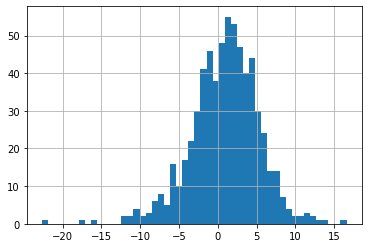

In [10]:

(Data.MKT*100).hist(bins=50)



List two/three features that are noteworthy about this plot?

- It is centered around the XXX

- It has a XXX shape

- The width of the part of the distribution that has the most realizations is captured by the XXX

- The most extreme observation is XXX standard deviations below the mean

**Time-Series PLOT**

The time-series plot shows us in each date what was the return on the asset in each month in the sample

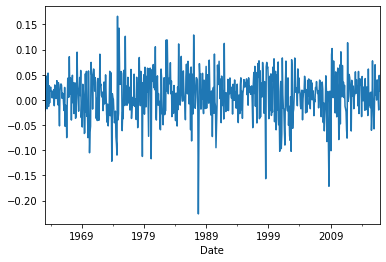

In [12]:
Data.MKT.plot()

## A quick review of randomness and probability distributions

**Random variables**

* We think of the return realization, the numbers plotted above, as a random variable, i.e., a variable that we are uncertain about it's realization. 

* Random variable is any thing that we don’t known

  * Outcome of dice throw, value of stock market in the end of the day, …
  * For example a dice outcome is a random variables with the following possible outcomes: (1,2,3,4,5,6)

* This uncertainty is fully described by the probability distribution associated with the random variable.





**What is a probability distribution?**

* A probability distribution describes the probability that each outcome is realized.
* It can be described by a Probability Density Function (pdf).
* For example, the pdf of a dice is (1,1/6) ,(2,1/6), (3,1/6), (4,1/6), (5,1/6), (6,1/6)
* It can also be described by the Cumulative Density Function(cdf)
* For a example, the cdf of a dice is (1,1/6) ,(2,2/6), (3,3/6), (4,4/6), (5,5/6), (6,6/6)
* A pdf or cdf fully describes the uncertainty we have with respect to a particular random variable
* Random variable is any thing that we don’t known
* Outcome of dice throw, value of stock market in the end of the day, …


**Moments**

* One way to summarize the information in a probability distribution is the moments

* Mean or expected value $E[𝑥]=∑𝑥_𝑖 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$  𝑜𝑟 $∫𝑥𝑓(𝑥)𝑑𝑥$  often uses µ as symbol

* The Variance $𝑣𝑎𝑟(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^2 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$    𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^2 𝑓(𝑥)𝑑𝑥 $ 
  
  * (Standard deviation $std(x)= \sqrt{𝑣𝑎𝑟(𝑥)}$)
  * measures average variability around the mean across successive drawings of x.
  * often use 𝜎 as a symbol for standard deviation and $𝜎^2$ for variance

* Skewness $𝑠𝑘𝑒𝑤(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^3 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$ 𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^3 𝑓(𝑥)𝑑𝑥$
  
  * Measures asymmetry in the distribution

* Kurtosis $𝑘𝑢𝑟𝑡(𝑥)= ∑(𝑥_𝑖−𝐸[𝑥])^4 𝑃𝑟𝑜𝑏(𝑥=𝑥_𝑖 )$ 𝑜𝑟 $∫(𝑥_𝑖−𝐸[𝑥])^4 𝑓(𝑥)𝑑𝑥$ 

  * Measures how fat the tails are

* Higher order moments…

* Observation: with enough moments you can represent any distribution, but in practice you only need a few
  
  * for example for the normal distribution you only need the first two: Expected value and variance!

**Sample moments**

* Historical distrivution is **NOT** the TRUE distribution that we care about

* Moments are  **never** truly known in real data

* Must be always estimated from some historical realization

* We would like to know the "population" moments, i.e., the moments that describe how the population is generated

* For example to get the expected return on the market, i.e. it's population mean, we use the sample mean

$$\overline{R_{MKT}}=\frac{\sum_{t=1}^TR_{MKT}}{T}$$

* where T is the sample size
* we also call the sample average

* Note that each observation in the sample is weighted  equally by the frequency of the **realized** observations

* For population means they are weighted by the **expected** frequency, i.e. the probabilities

* We say that the sample average is an **ESTIMATOR** for the true expected value

## **The Normal distribution**

* Most of what we do does not depend on the assumption of normality

* But normal distributions are very useful in statistical tests

* And they are also not a bad approximation for return data at low frequency (monthly/year) 




* Probability that any random draw form a Normal distribution random variable $\tilde{x}$ is within $n=1$ standard deviation from the mean is 0.6826


$$Prob(E[\tilde{x}]-1\sigma(\tilde{x})\leq \tilde{x}\leq E[\tilde{x}]+1\sigma(\tilde{x}))|_{n=1})=0.6826$$

* $n=2,Prob(\cdot)=0.9550$

$$Prob(E[\tilde{x}]-2\sigma(\tilde{x})\leq \tilde{x}\leq E[\tilde{x}]+2\sigma(\tilde{x}))|_{n=1})=0.9550$$
* it is convenient to to transform a normally distributed r.v. into units of standard deviations from it's mean


$$\tilde{z}=\frac{\tilde{x}-E[\tilde{x}]}{\sigma(\tilde{x})}$$

* This follows the "standard" normal distribution, which has mean 0 and and standard deviation 1 

* can you show that is indeed the case that z has mean zero and standard devaiton 1? 

* This means that the normal distribution is completely characterized by it's first two moments

* This means that the investment problem is much more tractable too!

* Only two moments to worry about:

    * The expected return of the portfolio
    
    * it's variance
    
    * The probability of really bad tail events will follow immediately from these two! 

**How to evaluate whether returns are normal?**


The standard approach is to look at higher moments.

Because the normal is entired descibed by the first two moments, looking at these higher moments can give us a clue if that is really true for the data at hand.

Here are a few:

* Skewness 

* Kurtosis 

* Frequency of extreme return realizations 

  * 3 sigma events should almost never happen for a normal random variable
  
  * once every 500 periods

  $$PROB(|R-E{R}|>3\sigma(R))$$


 A nice thing to do is to simulate data generated by a normal with same sample mean and standard deviation as the normal, and compare it with the actual data

In [5]:
# get you estimators 
mu=Data.MKT.mean()
std=Data.MKT.std()
# sample sze
T=Data.MKT.count()

<AxesSubplot:>

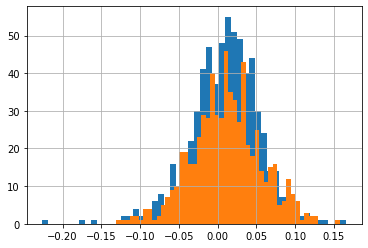

In [8]:
# simulate from a nomral distributiion wiht same mean, standard devation and sample size

X=pd.Series(np.random.normal(mu,std,T))

Data.MKT.hist(bins=50)
X.hist(bins=50)





- what happens if we increase the mean?

- what happens if we increase the standard deviation?

- for the same standard mean and standard deviation what do you notice when you compare the real data and the simulated data?


> This is only one simulation! Everytime you run the cell again it will draw a new set of realizations. Try it!


Lets look at higher moments of our data and the normal simulation

**Skewness**

What is the skewness of a normal distrbiution?

Does that hold for the simulation? Why not?

In [22]:


[Data.MKT.skew(), X.skew()]


[-0.5053783766354294, -0.11814774419178325]

**Kurtosis**

What is the Kurtosis of a normal distribution?

Does that hold in our simulation? Why not?

In [23]:

[Data.MKT.kurtosis(),X.kurtosis()]


[1.9881305187934846, 0.2796480959378349]

**Number of Extreme realizations**

To evaluate how close a distribution is to the normal distribution we typically look at how many observations in the real data are below a certain number of standard devations of the mean

In [9]:

X=pd.Series(np.random.normal(mu,std,T))
threshold=4
# counts for the real data
A=((Data.MKT-Data.MKT.mean())<-threshold*Data.MKT.std())
# counts for simulated data (which we know it is normal!)
B=((X-X.mean())<-threshold*X.std())

[A.sum(),B.sum()]



[2, 0]

**Simulating the Simulation**


- As we saw above, each simulation is naturally different.

- Like our sample, it is simply one draw of the distribution

-How often does the higher moments come the way that they do in our sample?

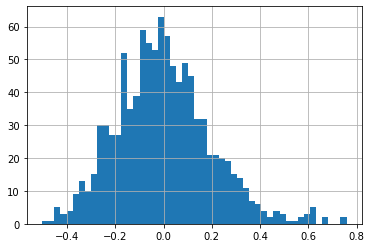

In [32]:
# I am initializing an array with 1000 zero entries
kurt=np.zeros(1000)

#now each step of the for loop I am drawing one realization of sample exactly as large as our sample
for i in range(0,1000):
    X=pd.Series(np.random.normal(mu,std,T))
    kurt[i]=X.kurtosis()
    


pd.Series(kurt).hist(bins=50)

If you compare this distribution with the kurtosis that we found on our data, what do you conclude?

**Why we might care about deviations from normality?**

**Volatility and Variance**

We know how to compute variance and what they are

$$Data.MKT.std()=\sqrt{\sum_{t=1}^T\frac{(R_{MKT,t}-\overline{R_{MKT}})^2}{T}}$$

where $\overline{R_{MKT}}=\sum_{t=1}^T\frac{R_{MKT,t}}{T}$ is the sample mean.


So for each series we get a number. We oftern refer to the standard deviation as the "vol" or the volatility of an asset.

Variance and volatility have the same content, but volatility is in the same unit as returns, and not square returns, so it easier  to have intuition about what it means.

For example, if the market has a vol of 20% per year, and if the market return is assumed to be normally distributed, I know that there is about a 2.5% probability that I will loose 40% of my investment by the end of the year!





**But what risk should you care about? What stock should be risky for you?**



The great insight from Harry Markowitz was to think of risk in terms of what the stock adds to your portfolio

Just like meat can be good for you if you are not eating any meat, it is terrible if you are eating a lot of it

What investors should care about is, just like eaters, their final diet. If a given stock brings a lot of what you already have, it will be bad for you, i.e., risky.

So volatility is a good gauge of risk at the portfolio level, because it is asking how your whole portfolio behaves, which you obvisoulsy should care about. If it goes down a lot, it means you cannot buy stuff!

But when thinking about a specific stock, it's volatility means very little.

Unless your entire portfolio is just that stock, you don't really need to bear the stock risk--if you have 1% in a stock and the stock drops to ZERO, that is only 1% in your portfolio, so at most you lose 1%. So whatever volatility this stock might have you SHOULD not perceive the stock as very risky for you.

As long, of course, your position in the stock remians small.

Note that if this stock would move together with other pieces of your portfolio then your calculation should be very different. If this stock goes to zero exactly when your other assets are also losing a lot of money, this will feel very risky trade.

The way to measure this degree of commonality between your portfolio and this particular stock is the covariance


$$Cov(R_{i,t},R_{j,t})={\sum_{t=1}^T\frac{(R_{i,t}-\overline{R_{i}})(R_{j,t}-\overline{R_{j}})}{T}}$$



In [10]:
#Lets reimport the data set and now keep the other assets
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])
Data.head()

,Date,RF,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
0,1963-02-28,0.0023,-0.0215,-0.001878,0.098222,-0.002773,NaN
1,1963-03-31,0.0023,0.0331,0.003342,0.014149,0.000371,0.001913
2,1963-04-30,0.0025,0.0476,-0.001843,-0.147055,-0.003336,0.008002
3,1963-05-31,0.0024,0.0200,-0.001807,-0.012172,-0.000186,0.004689
4,1963-06-30,0.0023,-0.0177,0.001666,-0.055699,-0.011160,0.003139



The Covariance matrix of a set of stocks is the matrix where cell $(i,j)$ has the covariance between asset $i$ and asset $j$:

In [14]:
# here for two assets
Data[['MKT','WorldxUSA','USA30yearGovBond','WorldxUSA','WorldxUSAGovBond']].cov()

,MKT,WorldxUSA,USA30yearGovBond,WorldxUSA,WorldxUSAGovBond
MKT,0.001936,0.001255,0.000104,0.001255,0.000182
WorldxUSA,0.001255,0.002175,-0.000017,0.002175,0.000419
USA30yearGovBond,0.000104,-0.000017,0.001226,-0.000017,0.000264
WorldxUSA,0.001255,0.002175,-0.000017,0.002175,0.000419
WorldxUSAGovBond,0.000182,0.000419,0.000264,0.000419,0.000407


note that the diagonal cell $(i,i)$ has the covariance between asset $i$ and asset $i$, which is just the variance of asset $i$

**Question: Why did I take out the risk-free rate when computing the variance?**


Another way of looking at this is the correlation matrix, which normalizes the covariances by the volatility of each asset:

$$Corr(R_{i,t},R_{j,t})={\frac{Cov(R_{i,t},R_{j,t})}{\sqrt{Var(R_{i,t})Var(R_{j,t})}}}$$

In [16]:
Data[['MKT','WorldxUSA','USA30yearGovBond','WorldxUSA','WorldxUSAGovBond']].corr()

,MKT,WorldxUSA,USA30yearGovBond,WorldxUSA,WorldxUSAGovBond
MKT,1.000000,0.611369,0.067779,0.611369,0.204491
WorldxUSA,0.611369,1.000000,-0.010180,1.000000,0.444938
USA30yearGovBond,0.067779,-0.010180,1.000000,-0.010180,0.373123
WorldxUSA,0.611369,1.000000,-0.010180,1.000000,0.444938
WorldxUSAGovBond,0.204491,0.444938,0.373123,0.444938,1.000000


* What is noteworthy about these relationships?

* What is safer for an US investor? US bond portfolio or World bond portfolio?

* What is safer for an international investor? US bond portfolio or World bond portfolio?



## **Excess returns** 


* It is convenient to decompose the return earned in terms of what you earn due to
  1. compensation for waiting (time-value of money)
  2. compensation for bearing risk (risk premium)
 
* To do the decomposition, we will do the following:
  * We first define an "<b>excess return</b>"： the return minus the risk-free rate 
 
 $$R_i^e=R_i-R_f$$
 
  * We typically use the returns of a 3-month treasury bill to measure $R_f$
 
  * So the excess return of the market is

      $$R^e_{MKT}=R_{MKT}-R_f$$

  * i.e. how much more I would get if I invested in the market instead of a short-term risk-free U.S. treasury bond

  * We call the **Expected difference**, the <b>Risk-Premium</b>

      $$E[R_i^e]=E[R_i-R_f]$$

  * It is how much more you expect to get by investing in asset $i$ instead of the risk-free asset

  * When asset $i$ is the total market portfolio of US equities, we call this, the <b>Equity Risky Premium</b>



**The Equity Risky Premium**

The expected difference in return earned by investing in the aggreagate stock market portfolio instead of the risk-free rate


  $$E[R_{MKT}-R_f]$$

One good estimate of it simply uses the sample mean

In [17]:
(Data.MKT-Data.RF).mean()*100

0.5140340030911901

What does this mean?

Lets look at how much money one would have if they had invested 1 dollar in the market and kept reinvesting until the end of our sample

lets then compare with an investment in the risk-free rate

$$(1+r_1)(1+r_2)....(1+r_T)$$

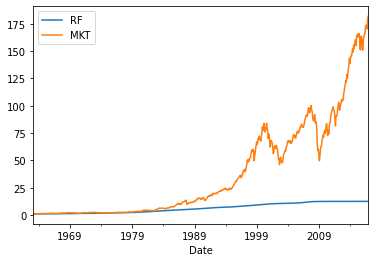

In [64]:
(1+Data[['RF','MKT']]).cumprod().plot()

This means that someone that invested 1 dollar in the market in 63, would have 182 dollars today.

A tota return of 182/1-1=18,100\%

If you invested in the risk-free rate you would have

12.5/1-1= 1,150\% which is a bit above the inflation in this same period

In [66]:
(1+Data[['RF','MKT']]).cumprod().tail(1)
(1+Data[['RF','MKT']]).prod()

RF      12.472682
MKT    181.954557
dtype: float64

**Why Excess returns are useful?**

All asset returns have both the risk-free component in it and the risk-premium component.

The risk-free component is directly observed-- for example in dollars it is convention to use the yield on the 3 month US goverment treasury bill

The average risk-free rate of the last 30 years tells you nothing about the risk-less rate today BECAUSE you can directly observe it. It is literally the rate of return that you get for sure if you buy a tbill and hold ultill maturity--and this rate of return is know in advance becasue we know the final price of the tbill.

The particular instrument that you use to measure the risk-free rate might vary depending on a variety of complicated considerations

- Is it funded instrument vs not funded (bills vs swaps)
- Acessible to everyone or only banks (bill vs fed funds)
- Can you borrow at this rate (bills vs your broker lending rate)

But the important point is that at any given moment you know the true risk-free rate. There is no point in estimating it


**Trading Interpretation**

* Excess reutrns have a nice trading interpretation.

* For example the excess return on the market (portfolio) is

$$R^{e,MKT}=R^{MKT}-R^F$$

* This is really a portfolio that has weights 1 on the market and -1 on the risk-free rate

* This type of portfolio is very important

* We call it a "self-financed portfolio" or "zero cost portfolio"

* The key is you are not putting any capital in it because you borrow 1 dollar to invest 1 dollar in the market (or in any other assets)

*Reality is a bit more complicated* 

* we will discuss this later, but in practice you always have to put some capital on the trade

* some investors don't really need to put much like banks and dealers, but others like retail investors are asked to put much more.And often the amount of capital that you have to put on a "zero-cost" trade fluctuates with liquidity conditions (a lot during crises, not much during booms) 

* These portfolios are nevertheless super useful empirically to understand the data even if in the real world you cannot directly buy the zero cost portfolios without putting capital

*Why is it that a broker dealer will ask you to put some capital to back the trade?*

## Sample averages vs Population Expectations

**How to go from the SAMPLE to the POPULATION distribution?**

We are interested in the true distribution of an asset returns going forward

But we only have it's historical behavior.

How do we extrapolate from it to the future?

We need a model!

In most of this class we will use a model where the distribution of excess returns is constant (does not vary over time). 

- under this assumption the sample mean of the asset excess return is a good estimator for the expected return of the asset going forward

- under the assumption that investors expected the average, the standard deviaiton is a good measure of the asset risk, becasue it measures deviations from expectations

- This however is not a good model for the risk-free rate!The risk-free rate obviously move over time!

- Time-variation in the risk-free rate as all about time-variaiton in what investors expected to get from investign in the tbill and none of it as risk/deviations of expectation

**why?**

Becasue we know that investor know the tbill yield so they perfectly know what they will get from investing in the tbill--and that is the reason we call it risk-free rate!

*Reality is a bit more complicated* 

This "constant premiuns" with time-varying risk-free rate allows us to go a long way.

But of course the data is more complicated!

- you might be able to predict the excess returns of an asset and in this case, i.e. there is time time-variation in the return premium to hold the assey

- In this case volatility will over-estimate the degree of risk, since part of the movement was not surprising to you-- so it is not risk

- certainly in the data there is some evidecne that we can predict excess returns a little bitbut by and large the constant premium assumption is a good approximation for an asset as the market portoflio

- Obvioulsy not good a approximation for an assets that it's riskness has changed-- Evergrande bonds have a very different risk today vs 5 years ago!
